In this project the idea is to build a model around the Wine Quality Dataset, in the cells I explain why I do what I do. There might be some variables in Spanish as the project was made in Spanish first.

In [2]:
# Import the libraries

import pandas as pd 
import numpy as np

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.model_selection import train_test_split

In [3]:
# Read the dataset, store it in 'df' and show the first 5 rows
df = pd.read_csv('CalidadVino.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# See the statistics of the features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# See some info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# Drop the null values as there are not much null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [7]:
# Drop the 'type' column with categorical data as it provides no information to determine the quality of a wine and has all categorical data
df.drop(['type'], inplace=True, axis=1)

In [8]:
# Split data in 'x' and 'y', store the features in 'x' and the target in 'y'
x = df.drop(['quality'], axis=1)
y = df['quality']

In [9]:
# Split data in train-validation and test
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Now split data in train and val so we have 3 splits: train, test and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val)

In [17]:
# Look the shapes
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')
print(f'Val shape: {X_val.shape}')

Train shape: (3877, 11)
Test shape: (1293, 11)
Val shape: (1293, 11)


In [21]:
# Standarization
mean_x = X_train.mean()
std_x = X_train.std()

X_train_scaled = (X_train - mean_x) / std_x
X_test_scaled = (X_test - mean_x) / std_x
X_val_scaled = (X_val - mean_x) / std_x

In [22]:
X_train_scaled.shape[0]

3877

In [51]:
# Create and compile the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# In this case I'm using 'mae' and 'mse' as metrics because we are looking for the probability of a wine to be part of a certain class
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

/home/aibg/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
# Train the model with the train data
history_reg = model.fit(X_train_scaled, y_train, epochs=200,
                        validation_data=(X_val_scaled, y_val))

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11.3904 - mae: 2.6671 - mse: 11.3904 - val_loss: 1.6368 - val_mae: 0.9544 - val_mse: 1.6368
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3877 - mae: 0.8979 - mse: 1.3877 - val_loss: 1.0694 - val_mae: 0.7902 - val_mse: 1.0694
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8941 - mae: 0.7270 - mse: 0.8941 - val_loss: 0.6271 - val_mae: 0.6080 - val_mse: 0.6271
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6383 - mae: 0.6290 - mse: 0.6383 - val_loss: 0.5756 - val_mae: 0.5797 - val_mse: 0.5756
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5192 - mae: 0.5653 - mse: 0.5192 - val_loss: 0.5292 - val_mae: 0.5508 - val_mse: 0.5292
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5550 - mae: 0.5770 - mse: 0.5550 - val_loss: 0.5005 - val_mae: 0.5402 - val_mse: 0.5005
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5022 - mae: 0.5508 - mse: 0.5

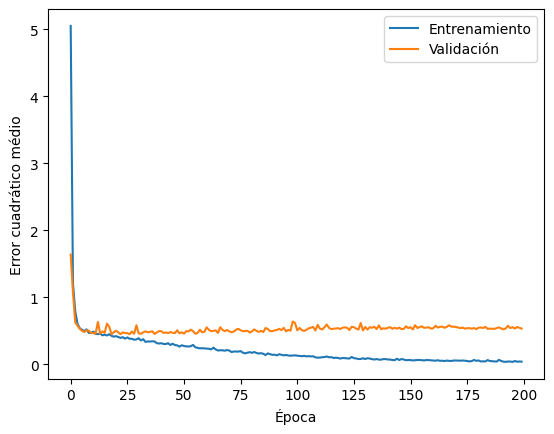

In [53]:
# Plot the loss curves of the train and validation set to see if the model is overfitting
def plot_history():
    plt.plot(history_reg.history['mse'], label="Entrenamiento")
    plt.plot(history_reg.history['val_mse'], label="Validación")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

In [54]:
# See the mse and rmse values
loss, mae, mse = model.evaluate(X_test_scaled, y_test)
rmse = np.sqrt(mse)
print('Error cuadrático medio en test: ', mse)
print('Raiz del error cuadrático medio en test: ', rmse)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.6914 - mae: 0.5912 - mse: 0.6914
Error cuadrático medio en test:  0.6096139550209045
Raiz del error cuadrático medio en test:  0.7807777885038127


In [56]:
# Make predictions with the model and print them
y_pred = model.predict(X_test_scaled)

print(f'Resultado esperado para el target 0: {y_test.iloc[0]}')
print(f'Resultado predicho para el target 0: {y_pred[0, 0]}\n')

print(f'Resultado esperado para el target 1: {y_test.iloc[1]}')
print(f'Resultado predicho para el target 1: {y_pred[1, 0]}\n')

print(f'Resultado esperado para el target 2: {y_test.iloc[2]}')
print(f'Resultado predicho para el target 2: {y_pred[2, 0]}\n')

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
Resultado esperado para el target 0: 5
Resultado predicho para el target 0: 5.089306354522705

Resultado esperado para el target 1: 6
Resultado predicho para el target 1: 5.826366424560547

Resultado esperado para el target 2: 4
Resultado predicho para el target 2: 5.582128047943115



In [61]:
# Another way of printing the predictions
for i in range(11):  # Iterar del 0 al 15
    print(f'Resultado esperado para el target {i}: {y_test.iloc[i]}')
    print(f'Resultado predicho para el target {i}: {y_pred[i, 0]}\n')

Resultado esperado para el target 0: 5
Resultado predicho para el target 0: 5.089306354522705

Resultado esperado para el target 1: 6
Resultado predicho para el target 1: 5.826366424560547

Resultado esperado para el target 2: 4
Resultado predicho para el target 2: 5.582128047943115

Resultado esperado para el target 3: 6
Resultado predicho para el target 3: 5.810954570770264

Resultado esperado para el target 4: 7
Resultado predicho para el target 4: 7.132789134979248

Resultado esperado para el target 5: 5
Resultado predicho para el target 5: 4.849647045135498

Resultado esperado para el target 6: 6
Resultado predicho para el target 6: 5.587769031524658

Resultado esperado para el target 7: 6
Resultado predicho para el target 7: 5.334160327911377

Resultado esperado para el target 8: 6
Resultado predicho para el target 8: 6.062695026397705

Resultado esperado para el target 9: 6
Resultado predicho para el target 9: 5.9693427085876465

Resultado esperado para el target 10: 6
Resultado